In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

: 

# Load Data

In [ ]:
X_data = pd.read_feather("../Data/trainingData/X_data.feather")
y_data = pd.read_feather("../Data/trainingData/full_data.feather").drop('index', axis = 1).to_numpy()

: 

## plots of unscaled data

In [ ]:
X_data.iloc[:,0].plot(kind='hist', subplots=True, figsize=(12, 10), sharex=False, bins = 100)
plt.suptitle("Hist Plot of T_inner", y=1.02)
plt.tight_layout()
plt.show()

: 

In [ ]:
X_data.iloc[:,1].plot(kind='hist', subplots=True, figsize=(12, 10), sharex=False, bins = 100)
plt.suptitle("Density Plots of V_inner", y=1.02)
plt.tight_layout()
plt.show()

: 

In [ ]:
X_data.iloc[:,2:4].plot(kind='hist', subplots=True, layout=(2, 2), figsize=(12, 10), sharex=False, bins = 100)
plt.suptitle("Density Plots of All Columns", y=1.02)
plt.tight_layout()
plt.show()

: 

In [ ]:
X_data.iloc[:,4:].plot(kind='hist', subplots=True, layout=(5, 2), figsize=(15, 10), sharex=False, bins = 100)
plt.suptitle("Hist Plots of All elements", y=1.02)
plt.tight_layout()
plt.show()

: 

# plots of scaled data

- Abundances ~exp

In [3]:
X_data["alpha"] = X_data.alpha *-1
X_data_scaled = np.log(X_data + 1e-10)


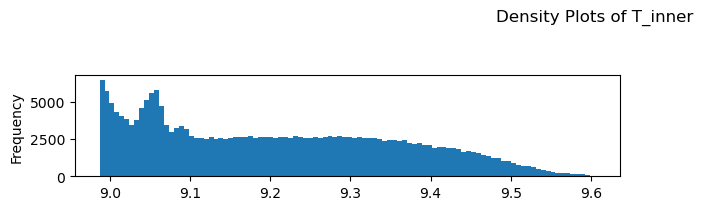

In [102]:
X_data_scaled.iloc[:,0].plot(kind='hist', subplots=True, layout=(7, 2), figsize=(12, 10), sharex=False, bins = 100)
plt.suptitle("Density Plots of T_inner", y=1.02)
plt.tight_layout()
plt.show()

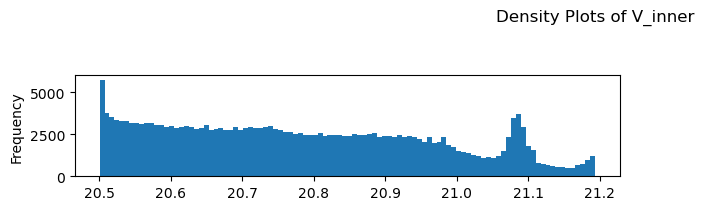

In [104]:
X_data_scaled.iloc[:,1].plot(kind='hist', subplots=True, layout=(7, 2), figsize=(12, 10), sharex=False, bins = 100)
plt.suptitle("Density Plots of V_inner", y=1.02)
plt.tight_layout()
plt.show()

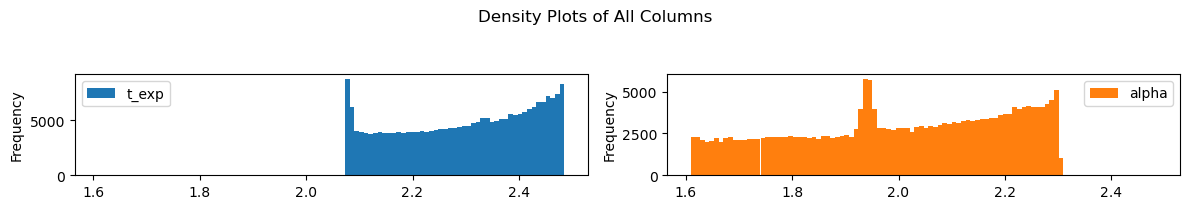

In [105]:
X_data_scaled.iloc[:,2:4].plot(kind='hist', subplots=True, layout=(7, 2), figsize=(12, 10), sharex=False, bins = 100)
plt.suptitle("Density Plots of All Columns", y=1.02)
plt.tight_layout()
plt.show()

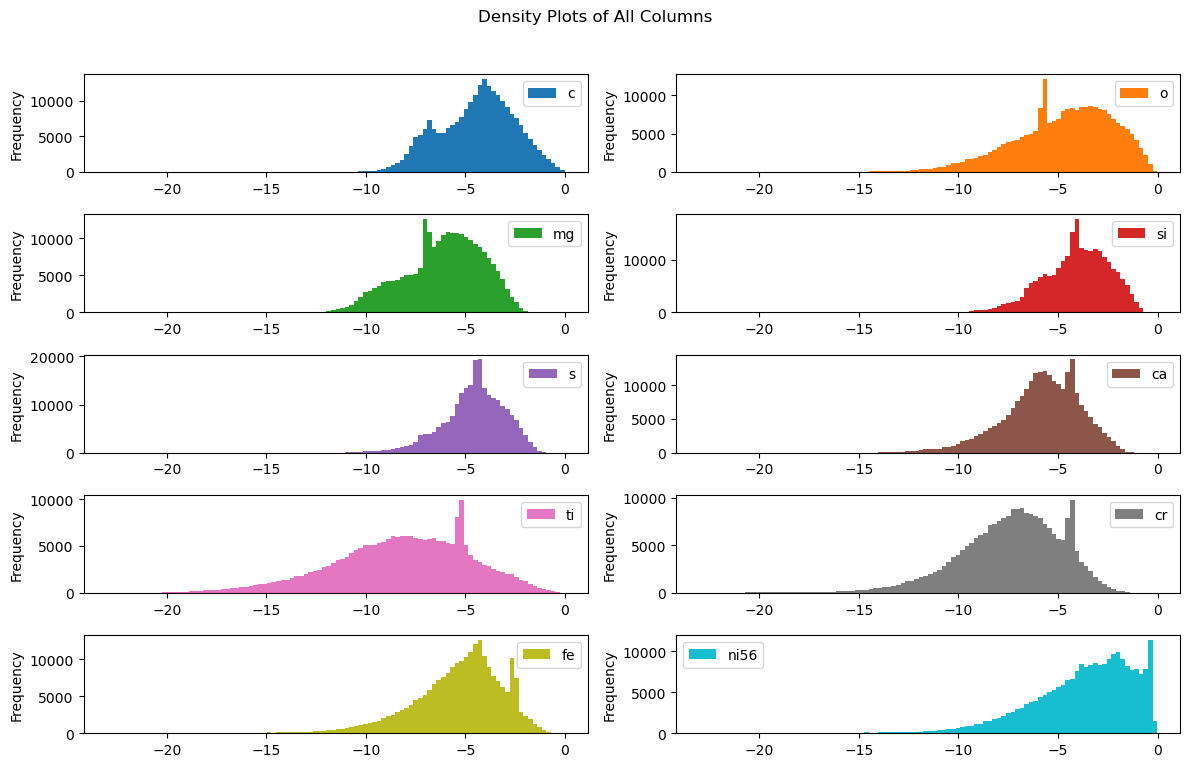

In [103]:
X_data_scaled.iloc[:,4:].plot(kind='hist', subplots=True, layout=(7, 2), figsize=(12, 10), sharex=False, bins = 100)
plt.suptitle("Density Plots of All Columns", y=1.02)
plt.tight_layout()
plt.show()

# Scale
- log scale
- standard scaler

In [6]:
X_data["alpha"] = X_data.alpha *-1
X_log = np.log(X_data + 1e-10)
y_log = np.log(y_data)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, random_state=22, train_size=.8)

In [8]:
scalar_X_tr = StandardScaler()
scalar_y_tr = StandardScaler()
scalar_X_tes = StandardScaler()
scalar_y_tes = StandardScaler()


scalar_X_tr.fit(X_train)
scalar_y_tr.fit(y_train)
scalar_X_tes.fit(X_test)
scalar_y_tes.fit(y_test)

StandardScaler()

In [9]:
joblib.dump(scalar_X_tr, "scalar_X_train.pkl")
joblib.dump(scalar_y_tr, "scalar_y_train.pkl")
joblib.dump(scalar_X_tes, "scalar_X_test.pkl")
joblib.dump(scalar_y_tes, "scalar_y_test.pkl")

['scalar_y_test.pkl']

In [14]:
X_scaled_train = scalar_X_tr.transform(X_train)
y_scaled_train = scalar_y_tr.transform(y_train)
X_scaled_test = scalar_X_tes.transform(X_test)
y_scaled_test = scalar_y_tes.transform(y_test)

# Visualise the transformed data

In [ ]:
X_scaled_train_df = pd.DataFrame(X_scaled_train, columns=X_train.columns)

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

X_scaled_train_df.iloc[:, 0].plot(ax=axes[0], kind="hist", bins=50, edgecolor='black')
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].set_title("Distribution of T_inner", loc="left", fontsize=15)

x.iloc[:, 1].plot(ax=axes[1], kind="hist", bins=50, edgecolor='black')
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].set_title("Distribution of v_inner", loc="left", fontsize=15)

plt.tight_layout()
plt.show()



# Inverse Transform

In [18]:
X_unscaled = np.exp(scalar_X_tr.inverse_transform(X_scaled_train))

,T_inner,v_inner,t_exp,alpha,c,o,mg,si,s,ca,ti,cr,fe,ni56
112513,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
26329,0.0,0.0,0.0,0.0,0.0,5.551115e-17,0.0,2.775558e-17,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
64595,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,2.775558e-17,0.0,8.673617e-18,1.214306e-17,0.0,0.0
219294,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
47459,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0


In [35]:
y_unscaled = np.exp(scalar_y_tr.inverse_transform(y_scaled_test))
y_unscaled[0,:40] = np.cumsum(y_unscaled[0,:40])

In [29]:
def inverse_transform(X, y, scalers):
    X_unscaled = np.exp(scalers[0].inverse_transform(X))
    y_unscaled = np.exp(scalers[1].inverse_transform(y))
    y_unscaled[0,:40] = np.cumsum(y_unscaled[0,:40])
    return X_unscaled, y_unscaled

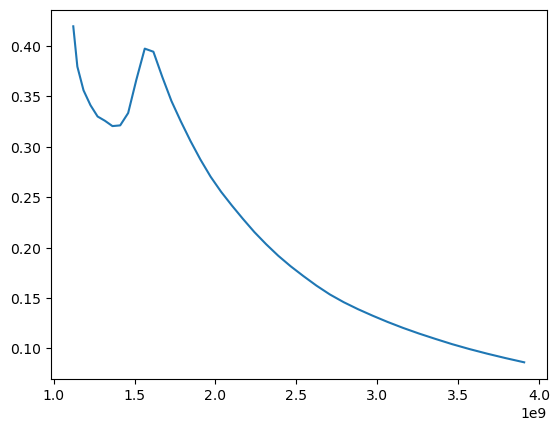

In [36]:
plt.plot(y_unscaled[0,:40], y_unscaled[0, 40:], label="Actual")

## Visual of the scaled data

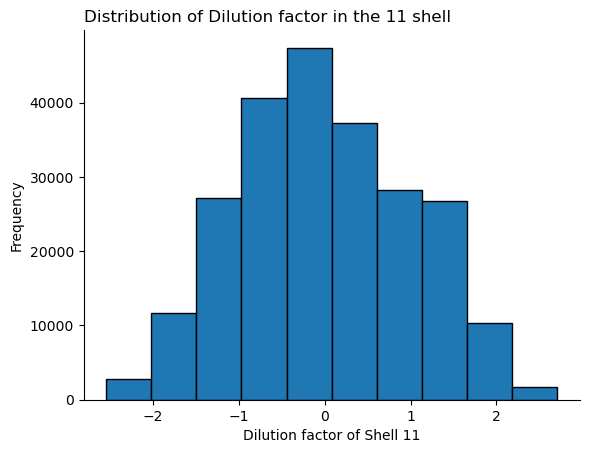

In [123]:
i = 10

plt.hist(y_scaled_train[:,i], edgecolor='black')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel(f'Dilution factor of Shell {i + 1}')
plt.ylabel('Frequency')
plt.title(f"Distribution of Dilution factor in the {i + 1} shell", loc='left')
plt.show()

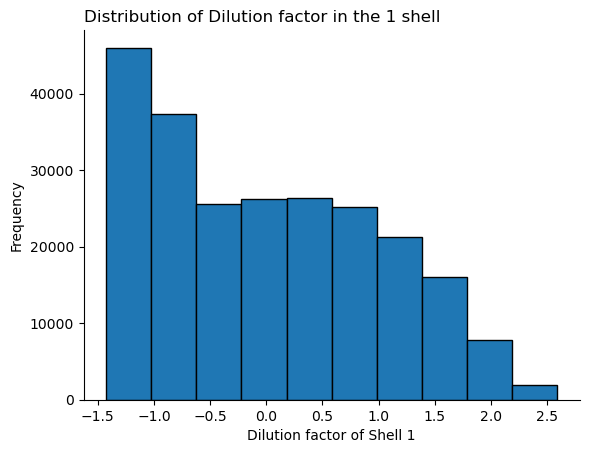

In [121]:
i = 0

plt.hist(X_scaled_train[:,i], edgecolor='black')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel(f'Dilution factor of Shell {i + 1}')
plt.ylabel('Frequency')
plt.title(f"Distribution of Dilution factor in the {i + 1} shell", loc='left')
plt.show()

# Test if inverse scaling works and test residuals

inverse standard scalar --- > e**X_log --- > Residuals

In [30]:
X_unscaled = np.e**scalar_X.inverse_transform(X_scaled)
y_unscaled = np.e**scalar_y.inverse_transform(y_scaled)

In [31]:
X_unscaled - X

array([[-1.90734863e-06, -1.67638063e-08, -6.70552254e-08, ...,
        -5.96046448e-08,  5.96046448e-08, -2.38418579e-07],
       [-2.38418579e-06, -1.11758709e-08, -7.07805157e-08, ...,
        -1.34110451e-07,  5.96046448e-08, -1.34110451e-07],
       [-3.57627869e-06, -9.31322575e-09, -7.45058060e-09, ...,
        -1.49011612e-08,  5.96046448e-08,  2.98023224e-08],
       ...,
       [-1.19209290e-07, -2.42143869e-08, -2.23517418e-08, ...,
         4.47034836e-08,  5.96046448e-08, -1.93715096e-07],
       [ 3.57627869e-07, -7.45058060e-09,  3.72529030e-09, ...,
        -8.94069672e-08, -6.70552254e-08, -3.72529030e-08],
       [-3.57627869e-07, -1.02445483e-08, -4.47034836e-08, ...,
        -2.23517418e-08, -7.45058060e-08, -1.49011612e-07]])

In [32]:
y_unscaled - y

array([[5.55111512e-17, 0.00000000e+00, 0.00000000e+00, ...,
        2.77555756e-17, 1.38777878e-17, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.77555756e-17, 2.77555756e-17, 2.77555756e-17],
       [0.00000000e+00, 0.00000000e+00, 5.55111512e-17, ...,
        2.77555756e-17, 0.00000000e+00, 1.38777878e-17],
       ...,
       [0.00000000e+00, 0.00000000e+00, 5.55111512e-17, ...,
        0.00000000e+00, 6.93889390e-18, 6.93889390e-18],
       [5.55111512e-17, 0.00000000e+00, 5.55111512e-17, ...,
        2.77555756e-17, 1.38777878e-17, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.77555756e-17, 0.00000000e+00, 1.38777878e-17]])

### Sanity check

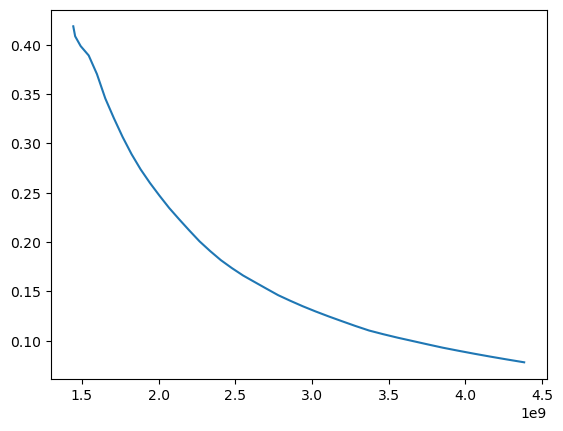

In [34]:
plt.plot(np.cumsum(X_unscaled[0,:]), y_unscaled[0])

# Time to push it out to the NN

In [31]:
import torch

In [32]:
X_nn_tr = torch.Tensor(X_scaled_train)
y_nn_tr = torch.Tensor(y_scaled_train)
X_nn_tes = torch.Tensor(X_scaled_test)
y_nn_tes = torch.Tensor(y_scaled_test)

In [33]:
file_path = "../Data/trainingData/"
torch.save(X_nn_tr, file_path+"X_nn_tr.pt")
torch.save(y_nn_tr, file_path+"y_nn_tr.pt")
torch.save(X_nn_tes, file_path+"X_nn_test.pt")
torch.save(y_nn_tes, file_path+"y_nn_test.pt")